In [38]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.patches as mpatches
plt.style.use('seaborn')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
%matplotlib inline

In [39]:
rl =pd.read_csv('chennai_reservoir_levels.csv')
rf = pd.read_csv('chennai_reservoir_rainfall.csv')
print(rl)
print(rf)


            Date  POONDI  CHOLAVARAM  REDHILLS  CHEMBARAMBAKKAM
0     01/01/2004     3.9         0.0     268.0              0.0
1     02/01/2004     3.9         0.0     268.0              0.0
2     03/01/2004     3.9         0.0     267.0              0.0
3     04/01/2004     3.9         0.0     267.0              0.0
4     05/01/2004     3.8         0.0     267.0              0.0
5     06/01/2004     3.8         0.0     266.0              0.0
6     07/01/2004     3.8         0.0     266.0              0.0
7     08/01/2004     3.7         0.0     265.0              0.0
8     09/01/2004     3.7         0.0     264.0              0.0
9     10/01/2004     3.7         0.0     264.0              0.0
10    11/01/2004     3.6         0.0     263.0              0.0
11    12/01/2004     3.6         0.0     262.0              0.0
12    13/01/2004     3.6         0.0     261.0              0.0
13    14/01/2004     3.5         0.0     260.0              0.0
14    15/01/2004     3.5         0.0    

In [40]:
rl['Month'] = rl['Date'].apply(lambda s: s.split('/')[1])
rl['Year'] = rl['Date'].apply(lambda s: s.split('/')[2])
rl['Date'] = pd.to_datetime(rl['Date'], format='%d/%m/%Y')
rl.set_index('Date',inplace=True)

In [41]:
rl

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Month,Year
Date,,,,,,
2004-01-01,3.9,0.0,268.0,0.0,01,2004
2004-01-02,3.9,0.0,268.0,0.0,01,2004
2004-01-03,3.9,0.0,267.0,0.0,01,2004
2004-01-04,3.9,0.0,267.0,0.0,01,2004
2004-01-05,3.8,0.0,267.0,0.0,01,2004
2004-01-06,3.8,0.0,266.0,0.0,01,2004
2004-01-07,3.8,0.0,266.0,0.0,01,2004
2004-01-08,3.7,0.0,265.0,0.0,01,2004
2004-01-09,3.7,0.0,264.0,0.0,01,2004


In [42]:
rl['Total'] = rl['POONDI'] + rl['CHOLAVARAM'] + rl['REDHILLS'] +rl['CHEMBARAMBAKKAM']




In [43]:
rl['Total']

Date
2004-01-01    271.9
2004-01-02    271.9
2004-01-03    270.9
2004-01-04    270.9
2004-01-05    270.8
2004-01-06    269.8
2004-01-07    269.8
2004-01-08    268.7
2004-01-09    267.7
2004-01-10    267.7
2004-01-11    266.6
2004-01-12    265.6
2004-01-13    264.6
2004-01-14    263.5
2004-01-15    262.5
2004-01-16    261.4
2004-01-17    259.4
2004-01-18    257.4
2004-01-19    255.4
2004-01-20    253.4
2004-01-21    250.3
2004-01-22    247.3
2004-01-23    245.3
2004-01-24    242.3
2004-01-25    240.2
2004-01-26    237.2
2004-01-27    235.9
2004-01-28    234.9
2004-01-29    231.9
2004-01-30    229.9
              ...  
2019-05-19    144.0
2019-05-20    135.0
2019-05-21    127.0
2019-05-22    120.0
2019-05-23    112.0
2019-05-24    104.0
2019-05-25     97.0
2019-05-26     93.0
2019-05-27     89.0
2019-05-28     83.0
2019-05-29     76.0
2019-05-30     70.0
2019-05-31     65.0
2019-06-01     61.0
2019-06-02     58.0
2019-06-03     55.0
2019-06-04     52.0
2019-06-05     50.0
2019-06-06     

In [44]:
rf['Month'] = rf['Date'].apply(lambda s: s.split('/')[1])
rf['Year'] = rf['Date'].apply(lambda s: s.split('/')[2])
rf['Date'] = pd.to_datetime(rf['Date'], format='%d/%m/%Y')
rf.set_index('Date',inplace=True)

In [45]:
rf['Total'] = rf['POONDI'] + rf['CHOLAVARAM'] + rf['REDHILLS'] +rf['CHEMBARAMBAKKAM']

rf['Total']

Date
2004-01-01     0.0
2004-01-02     0.0
2004-01-03     0.0
2004-01-04     0.0
2004-01-05     0.0
2004-01-06     0.0
2004-01-07     0.0
2004-01-08     0.0
2004-01-09     0.0
2004-01-10     0.0
2004-01-11     0.0
2004-01-12     0.0
2004-01-13     0.0
2004-01-14     0.0
2004-01-15     0.0
2004-01-16     0.0
2004-01-17     0.0
2004-01-18     0.0
2004-01-19     0.0
2004-01-20     0.0
2004-01-21     0.0
2004-01-22     0.0
2004-01-23     0.0
2004-01-24     0.0
2004-01-25     0.0
2004-01-26     0.0
2004-01-27    39.0
2004-01-28    72.0
2004-01-29     0.0
2004-01-30     0.0
              ... 
2019-05-19     0.0
2019-05-20     0.0
2019-05-21     0.0
2019-05-22     0.0
2019-05-23     0.0
2019-05-24     0.0
2019-05-25     0.0
2019-05-26     0.0
2019-05-27     0.0
2019-05-28     0.0
2019-05-29     0.0
2019-05-30     0.0
2019-05-31     0.0
2019-06-01     0.0
2019-06-02     0.0
2019-06-03     0.0
2019-06-04     0.0
2019-06-05     0.0
2019-06-06     0.0
2019-06-07     0.0
2019-06-08     0.0
2019-06

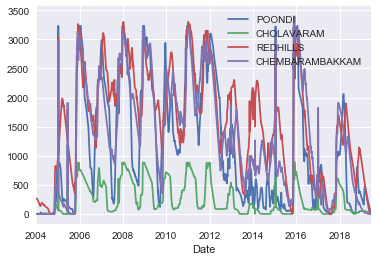

In [46]:
rl[['POONDI','CHOLAVARAM','REDHILLS','CHEMBARAMBAKKAM']].plot()
plt.show()

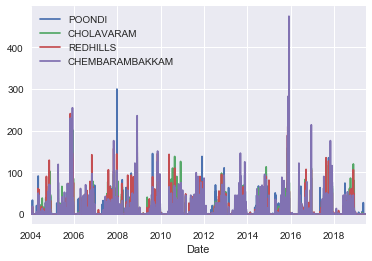

In [47]:
rf[['POONDI','CHOLAVARAM','REDHILLS','CHEMBARAMBAKKAM']].plot()
plt.show()

KeyError: 'Date'

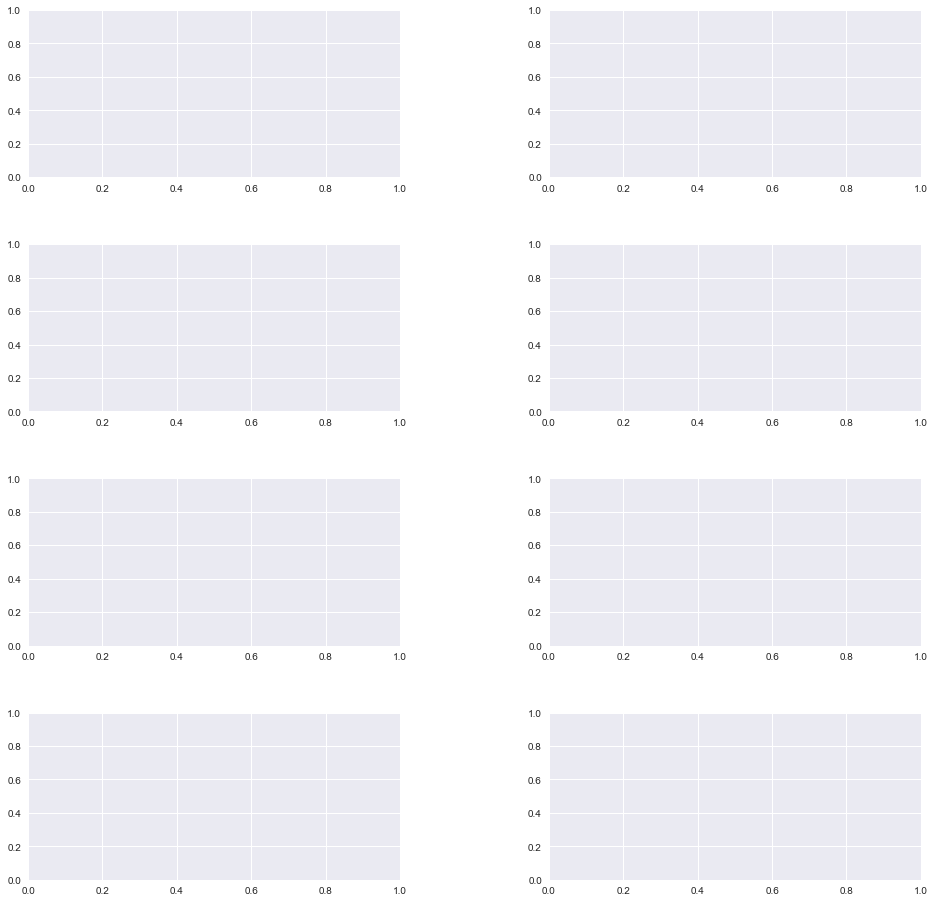

In [48]:
def plot_rainfall_and_reservoir_levels(rl, rf, type='line', alpha=1):
    """
    Creates 8 plots, 4 rows and 2 columns, with one row per region in Chennai where the first
    "cell" holds the reservoir levels over time and the second holds rainfall levels over time.
    The 'type' variable determines the output is a line plot (type = 'line') or if the output is
    a barplot (type != 'line').
    """
    fig, ax = plt.subplots(4, 2, figsize=(16, 16))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for index, column in enumerate(rl.columns[1:]):
        c = colors[index]
        if type == 'line':
            ax[index][0].plot(rl['Date'], rl[column], color=c, alpha=alpha)
            ax[index][1].plot(rf['Date'], rf[column], color=c, alpha=alpha)
        else:
            ax[index][0].bar(rl['Date'], rl[column], color=c, alpha=alpha)
            ax[index][1].bar(rf['Date'], rf[column], color=c, alpha=alpha)
        ax[index][0].set_ylabel(column, size=14)
        ax[index][1].set_ylabel(column, size=14)
        ax[index][0].set_title('Reservoir Levels in mcft', size=14)
        ax[index][1].set_title('Rainfall Levels in mm', size=14)
    fig.suptitle('Reservoir and Rainfall Levels Over Time', size=15)

plot_rainfall_and_reservoir_levels(rl, rf)